# Описнаие проекта / Project description

1) Импорт данныхд.
В проекте применены библиотеки pandas, phik

2) Предобраюотка дынных

3) Разработка синтетических данных.

4) Проверка на мультиколлинеарность.
Использована библиотека phik (одновременно умеет работать с различными типами признаков: числовые, категориальные, бинарные, ранговые и тд). https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7


3) В проекте использованы sklearn.pipeline в своем исследовании (если вы хотите выйти за пределы учебной программы). Скидываю вам материалы про Pipeline, ColumnTransformers, GridSearchCV:

- вот статьи про Pipeline и Сolumntransformer
https://medium.com/mlearning-ai/neat-data-preprocessing-with-pipeline-and-columntransformer-2a0468865b6b
https://towardsdatascience.com/pipelines-custom-transformers-in-scikit-learn-the-step-by-step-guide-with-python-code-4a7d9b068156

- статья про Pipeline и GridSearchCV - https://towardsdatascience.com/an-introduction-to-building-pipelines-and-using-grid-searches-in-scikit-learn-92ea72f9b5b7

4) Примеры хороших отчетов можно посмотреть на сайте Stanford University - отчеты по финальным проектам направления Machine Learning - https://cs229.stanford.edu/projects2014.html. Из примеров понятно наполнение отчета по исследованию, а так же, что главное - понятна сама структура отчета.

- Оценка важности признаков. Можно воспользоваться встроенными стредствами в моделях (например атрибут у «деревянных» моделей feature_importances_). Вот хорошая обзорная статья по этой теме, где рассматриваются несколько методов из библиотеки sklearn - https://medium.com/analytics-vidhya/feature-importance-explained-bfc8d874bcf

- Библиотека shap — позволяет детально изучить работу модели, в том числе оценить важность признаков, при этом не привязана к работе конкретного алгортима прогнозирования. Вот статья с описанием ее работы — https://habr.com/ru/articles/428213/ и детальный разбор графиков - https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137

6. Подбор гиперпараметров можно выполнять не только используя GridSearchCV и RandomizedGridSearchCV. Можно использовать более продвинутые (и эффективные) методы — почитайте про библиотеку scikit-optimize и ее методы - https://scikit-optimize.github.io/stable/auto_examples/sklearn-gridsearchcv-replacement.html. Так же есть библиотека optuna,  но ее использование сложнее чем все предыдущие методы — вот статья на русском https://habr.com/ru/articles/704432/


Проект будет разбит на 2 части. Предобработка и ML. вторая часть будет отдельным блоком трансформировать исходный датасет в бд с предобработанными данными.

# Импорт данных и библиотек / Data & libraries import 

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

#pip install phik
import phik
from phik.report import plot_correlation_matrix
from phik import report

#ML

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score


#pip install catboost
from catboost import CatBoostClassifier
from catboost import cv, Pool
from catboost import MetricVisualizer

In [10]:
music_df = pd.read_csv('C:\data/kaggle_music_genre_train.csv')
music_test = pd.read_csv('C:\data/kaggle_music_genre_test.csv')
sample = pd.read_csv('C:\data/sample_submit.csv')

In [11]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       20394 non-null  float64
 1   track_name        20394 non-null  object 
 2   acousticness      20394 non-null  float64
 3   danceability      20394 non-null  float64
 4   duration_ms       20394 non-null  float64
 5   energy            20394 non-null  float64
 6   instrumentalness  20394 non-null  float64
 7   key               19659 non-null  object 
 8   liveness          20394 non-null  float64
 9   loudness          20394 non-null  float64
 10  mode              19888 non-null  object 
 11  speechiness       20394 non-null  float64
 12  tempo             19952 non-null  float64
 13  obtained_date     20394 non-null  object 
 14  valence           20394 non-null  float64
 15  music_genre       20394 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

Описание полей данных

- instance_id - уникальный идентификатор трека
- track_name - название трека
- acousticness - акустичность
- danceability - танцевальность
- duration_ms -продолжительность в милисекундах
- energy - энергичность
- instrumentalness - инструментальность
- key
- liveness - привлекательность
- loudness - громкость
- mode
- speechiness - выразительность
- tempo - темп
- obtained_date - дата загрузки в сервис
- valence - привлекательность произведения для пользователей сервиса
- music_genre - музыкальный жанр

In [12]:
music_df

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,25143.0,Highwayman,0.48000,0.670,182653.0,0.351,0.017600,D,0.1150,-16.842,Major,0.0463,101.384,4-Apr,0.450,Country
1,26091.0,Toes Across The Floor,0.24300,0.452,187133.0,0.670,0.000051,A,0.1080,-8.392,Minor,0.0352,113.071,4-Apr,0.539,Rock
2,87888.0,First Person on Earth,0.22800,0.454,173448.0,0.804,0.000000,E,0.1810,-5.225,Minor,0.3710,80.980,4-Apr,0.344,Alternative
3,77021.0,No Te Veo - Digital Single,0.05580,0.847,255987.0,0.873,0.000003,G#,0.3250,-4.805,Minor,0.0804,116.007,4-Apr,0.966,Hip-Hop
4,20852.0,Chasing Shadows,0.22700,0.742,195333.0,0.575,0.000002,C,0.1760,-5.550,Major,0.0487,76.494,4-Apr,0.583,Alternative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20389,47396.0,O Pato,0.71900,0.725,-1.0,0.483,0.000000,NaN,0.0797,-13.314,Minor,0.0438,87.413,4-Apr,0.942,Jazz
20390,44799.0,Mt. Washington,0.19000,0.482,198933.0,0.362,0.005620,F#,0.0913,-10.358,Minor,0.0299,76.879,4-Apr,0.174,Rock
20391,33350.0,Original Prankster,0.00061,0.663,220947.0,0.886,0.000025,D,0.2840,-4.149,Major,0.0358,146.803,4-Apr,0.942,Alternative
20392,77920.0,4Peat,0.00310,0.914,162214.0,0.515,0.000000,C#,0.1050,-9.934,Major,0.3560,150.016,4-Apr,0.215,Rap


– ISRC является самым простым и оперативным способом идентификации владельца прав на музыкальное или видео произведение в случае, если после присвоения кода владелец прав не менялся.

# Разработка ML модели / ML model development 

Задачей проекта является разработать модель машинного обучения, которая будет способна определить жанр музыки, опираясь на набор признаков, приведенный в датасете.

Исходя из задачи принимается целевой признак:
- music_genre 

The project task is the ML model developing, which will be able to determine music genre, on the base of df features.

Based on the task the target feature is:
- music_genre 

## Анализ на мультиколлинеарность / Multicolliniarity analysis

In [13]:
#Разработка матрицы 𝜙k / 𝜙k correlation matrix

phik_music_df = music_df.phik_matrix()
phik_music_df.round(2)

interval columns not set, guessing: ['instance_id', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']


C:\Users\r3\anaconda3\lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable track_name is large: 18643. Are you sure this is not an interval variable? Analysis for pairs of variables including track_name can be slow.
  warnings.warn(


,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
instance_id,1.00,0.06,0.00,0.03,0.02,0.00,0.00,0.01,0.02,0.00,0.02,0.00,0.00,0.02,0.00,0.00
track_name,0.06,1.00,0.94,0.96,0.99,0.95,0.96,0.94,0.95,0.98,0.78,0.94,0.96,0.93,0.94,0.56
acousticness,0.00,0.94,1.00,0.46,0.13,0.77,0.44,0.10,0.19,0.71,0.03,0.20,0.34,0.26,0.40,0.66
danceability,0.03,0.96,0.46,1.00,0.17,0.52,0.34,0.10,0.14,0.48,0.10,0.34,0.41,0.29,0.53,0.62
duration_ms,0.02,0.99,0.13,0.17,1.00,0.14,0.17,0.04,0.09,0.17,0.01,0.04,0.08,0.04,0.14,0.20
energy,0.00,0.95,0.77,0.52,0.14,1.00,0.44,0.09,0.26,0.84,0.03,0.24,0.39,0.29,0.48,0.67
instrumentalness,0.00,0.96,0.44,0.34,0.17,0.44,1.00,0.03,0.14,0.50,0.08,0.19,0.22,0.13,0.36,0.57
key,0.01,0.94,0.10,0.10,0.04,0.09,0.03,1.00,0.06,0.08,0.36,0.12,0.04,0.07,0.04,0.17
liveness,0.02,0.95,0.19,0.14,0.09,0.26,0.14,0.06,1.00,0.20,0.03,0.14,0.08,0.04,0.13,0.21
loudness,0.00,0.98,0.71,0.48,0.17,0.84,0.50,0.08,0.20,1.00,0.02,0.21,0.36,0.25,0.44,0.68


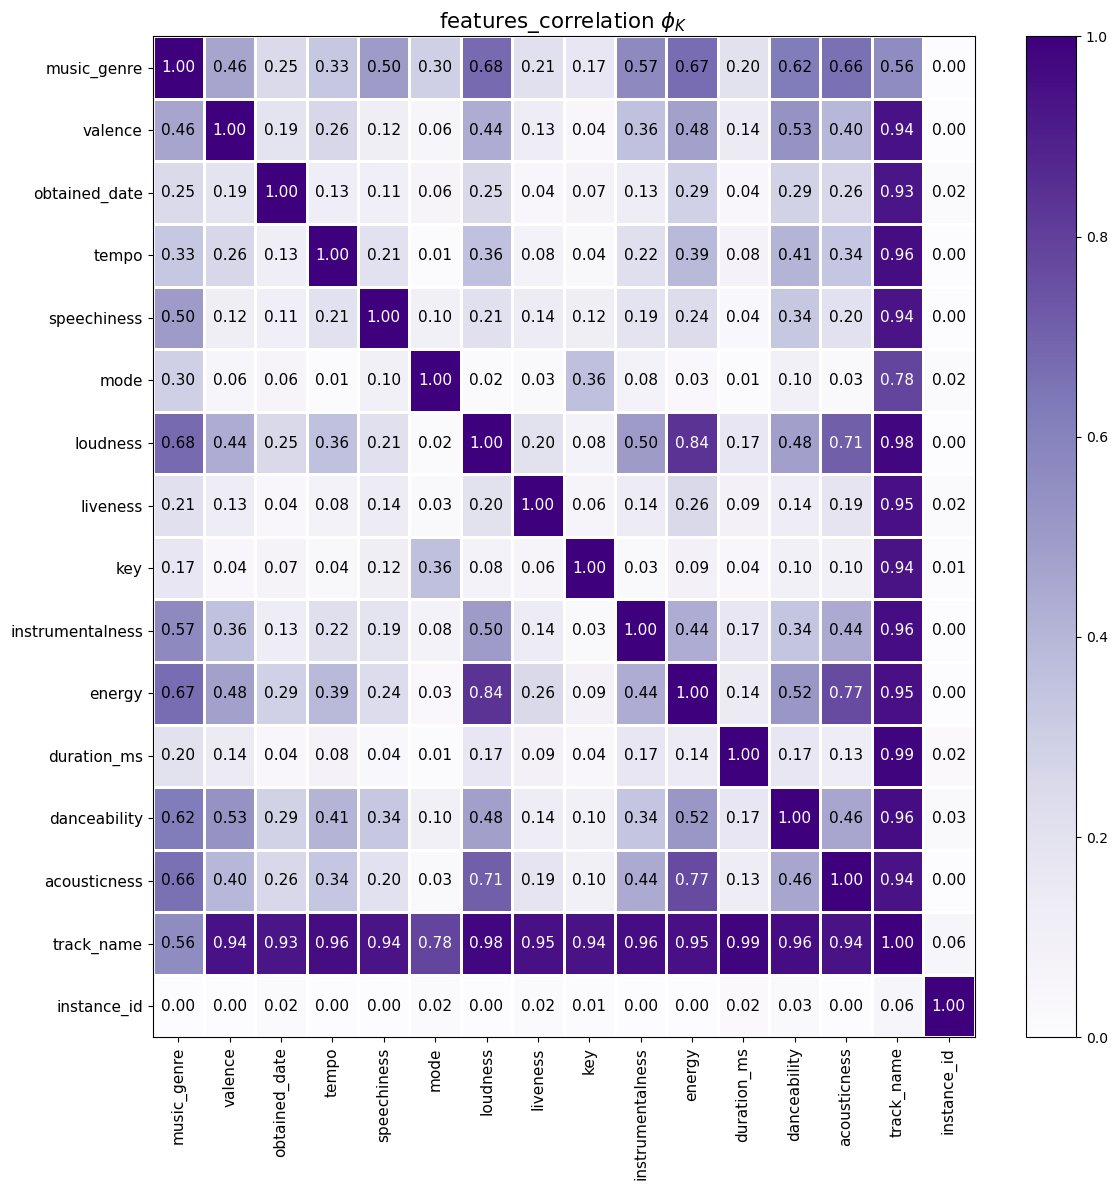

In [15]:
#Визуализация матрицы 𝜙k / 𝜙k matrix visualisation

plot_correlation_matrix(phik_music_df.values, 
                        x_labels=phik_music_df.columns, 
                        y_labels=phik_music_df.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"features_correlation $\phi_K$", 
                        fontsize_factor=1.1, 
                        figsize=(12, 12))
plt.tight_layout()

В рамках анализа на мультиколлинеарность выявлено, что признак music_genre имеет кореллляию со следующими признаками:

['loudness', 'energy', 'acousticness', 'danceability', 'instrumentalness', 'track_name', 'speechiness'] 

Признаки приведены в порядке убывания значения коэффициента корреляции.

In the borders of multicollinearity analysis was revealed that feature music_genre has correlation with folowing features:

['loudness', 'energy', 'acousticness', 'danceability', 'instrumentalness', 'track_name', 'speechiness']

Features attached in correlation coaficient descending order

In [17]:
#Список признаков, коррелирующих с целевым / The features list with target feature correlation
features_corr = ['loudness', 'energy', 'acousticness', 
                 'danceability', 'instrumentalness', 'track_name', 'speechiness']

## Отбор признаков и распределение на выборки / Features selection & distribution into samples


In [18]:
#Исключим из фрейма данных признаки, не коррелирующие с целевым. Выделим целевой признак и фичи.
features = music_df[features_corr]
target = music_df['music_genre']


In [19]:
#Тестовая и валидационная выборки . Test & Validation sampels
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size = 0.25, random_state = 12345)

## Выбор лучшей ML  модели /  Choice of the best ML model

### Проверка дисбаланса данных / Disbalance data checking

<Axes: xlabel='music_genre', ylabel='frequeny'>

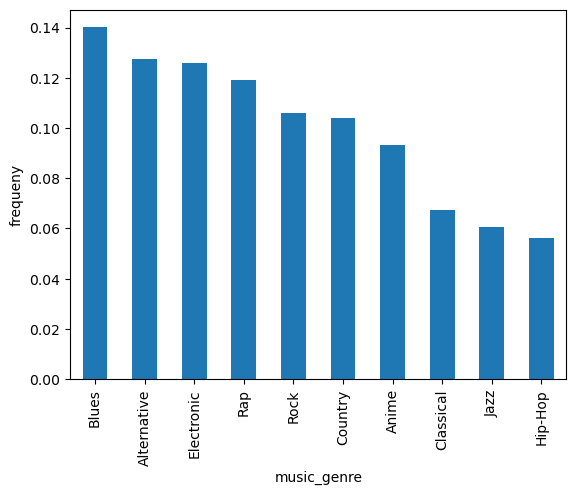

In [20]:
class_frequency = music_df['music_genre'].value_counts(normalize=True)
class_frequency.plot(kind='bar', xlabel = 'music_genre', ylabel = 'frequeny')

### CatBoostClassifier

In [21]:
#Catigorical features declaration
cat_features = list(features.select_dtypes(include = 'object').columns)
cat_features

['track_name']

In [22]:
#Pool of CatBoost data
train_data = Pool (data = features,
                   label = target,
                   cat_features = cat_features
                  )

In [23]:
#ML model 
model_CBR = CatBoostClassifier(iterations = 100, 
                               learning_rate = 0.14,
                              random_seed = 20,
                              custom_loss = ['AUC', 'Accuracy'],
                              use_best_model = True)
#ML and graph plotting
model_CBR.fit(features_train, 
              target_train, 
              cat_features = cat_features,
              eval_set = (features_valid, target_valid),
              verbose = False,
             plot = True)
print(model_CBR.get_params())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

{'iterations': 100, 'learning_rate': 0.14, 'random_seed': 20, 'use_best_model': True, 'custom_loss': ['AUC', 'Accuracy']}


In [24]:
#Metric calculation
prediction = model_CBR.predict(features_valid)

f1 = f1_score(target_valid, prediction, average = 'micro')
print("F1:", f1)

F1: 0.4583251617964307


#### Cross-Validation

In [25]:
#Params data dict
params = {}
params['loss_function'] = 'MultiClass'
params['iterations'] = 100
params['custom_loss'] = 'F1'
params['random_seed'] = 20
params['learning_rate'] = 0.15

#data cross-validation
cv_music_df = cv(params = params, 
                 pool = Pool(features, label = target, cat_features = cat_features),
                 fold_count =5,
                 shuffle=True,
                 partition_random_seed=0,
                 plot=True,
                 stratified=True, #class ratio
                 verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 1.507088733
bestIteration = 99

Training on fold [1/5]

bestTest = 1.522214056
bestIteration = 99

Training on fold [2/5]

bestTest = 1.527675821
bestIteration = 99

Training on fold [3/5]

bestTest = 1.504303151
bestIteration = 99

Training on fold [4/5]

bestTest = 1.510576348
bestIteration = 99



In [26]:
cv_music_df

,iterations,test-MultiClass-mean,test-MultiClass-std,train-MultiClass-mean,train-MultiClass-std,test-F1-mean,test-F1-std,train-F1-mean,train-F1-std
0,0,2.134846,0.001521,2.133310,0.000832,NaN,NaN,NaN,NaN
1,1,2.034829,0.001992,2.031426,0.001623,NaN,NaN,NaN,NaN
2,2,1.960406,0.005260,1.954509,0.004026,NaN,NaN,NaN,NaN
3,3,1.899021,0.007967,1.891411,0.006054,NaN,NaN,NaN,NaN
4,4,1.847770,0.007742,1.838550,0.005097,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
95,95,1.515742,0.009862,1.432060,0.004020,NaN,NaN,NaN,NaN
96,96,1.515454,0.009892,1.430832,0.003898,NaN,NaN,NaN,NaN
97,97,1.515133,0.009940,1.429658,0.003858,NaN,NaN,NaN,NaN
98,98,1.514780,0.010059,1.428358,0.003554,NaN,NaN,NaN,NaN


# Test Data prediction

In [27]:
# correction of music_test data in accordance with music_df
music_test_learn = music_test.drop(['instance_id', 'duration_ms', 'key', 'liveness', 'mode', 'tempo',
       'obtained_date', 'valence'], axis= 1)
music_test_learn.head(5)

,track_name,acousticness,danceability,energy,instrumentalness,loudness,speechiness
0,Low Class Conspiracy,0.301000,0.757,0.679,0.00000,-7.136,0.3560
1,The Hunter,0.538000,0.256,0.523,0.00832,-5.175,0.0294
2,Hate Me Now,0.005830,0.678,0.770,0.00000,-4.399,0.2220
3,Somebody Ain't You,0.020300,0.592,0.749,0.00000,-4.604,0.0483
4,Sour Mango,0.000335,0.421,0.447,0.01480,-8.833,0.2020


In [28]:
#Test data predictions
test_pool = Pool(music_test_learn, cat_features = cat_features)
predicted_test = model_CBR.predict(test_pool)
predicted_test


array([['Rap'],
       ['Blues'],
       ['Rap'],
       ...,
       ['Rap'],
       ['Electronic'],
       ['Blues']], dtype=object)

In [29]:
#Music genre prediction
music_test['music_genre'] = predicted_test
music_test.head(2)

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,48564,Low Class Conspiracy,0.301,0.757,146213.0,0.679,0.00000,A#,0.3030,-7.136,Minor,0.3560,90.361,4-Apr,0.895,Rap
1,72394,The Hunter,0.538,0.256,240360.0,0.523,0.00832,G#,0.0849,-5.175,Major,0.0294,78.385,4-Apr,0.318,Blues


In [30]:
#DF preparation for kaggle loading
music_test_kaggle = music_test.drop(['track_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'obtained_date', 'valence'], axis = 1)
music_test_kaggle

,instance_id,music_genre
0,48564,Rap
1,72394,Blues
2,88081,Rap
3,78331,Country
4,72636,Electronic
...,...,...
5094,50532,Country
5095,26255,Rap
5096,67924,Rap
5097,79778,Electronic


In [34]:
#Kaggle form saving
music_test_kaggle.to_csv('C:\data/pred_to_kaggle.csv',index=False, index_label=None)
